#### Explorative

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold




In [3]:
#load data
df = pd.read_csv("../data/H1.csv")

### Vorverarbeitung

Ziel ist die Klassifikation ob eine Hotelbuchung storniert wird, mit Zielvariable: "Is Canceled"

In [9]:
y = df["IsCanceled"]

# Läschen von unnötigen Spalten
X = df.drop(columns=[
    "IsCanceled", "ReservationStatus", "ReservationStatusDate",
    "Company", "Agent", "AssignedRoomType", "ReservedRoomType"
])

#one-hot-encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

#Standart Scaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model

In [ ]:
#model initalization
svc = SVC(probability=True, C=10, gamma=0.01, kernel='rbf')

In [11]:
#Training the model with grid search
svc.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


ROC AUC Score (SVC): 0.940445775620226


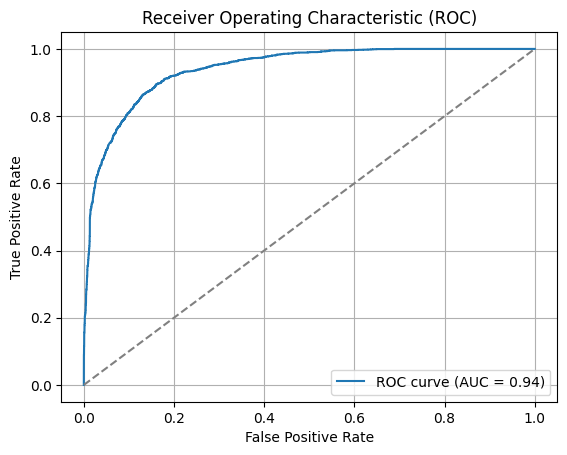

In [12]:
# ROC AUC Score for the svc model
y_prob_svc = svc.predict_proba(X_test)[:, 1]
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)
print("ROC AUC Score (SVC):", roc_auc_svc)

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict the probabilities
y_score = svc.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

